<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - Bootcamp Course Fall 2020

## Important  - Assignment Guidelines

1. Before you turn in your assignment, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. In the cells below you will replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run properly.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **IMPORTANT: DO NOT RENAME THIS NOTEBOOK!** If the file name changes, the autograder will not grade your assignment properly.
5. **Do not rename the notebook file.** If you do, the autograder will not recognize your submisson.
6. When you plot, please comment out `plt.show()` as the code below will effectively run `plt.show()` for you and also will grab your plot for autograding. DO NOT DELETE any code that says `DO NOT REMOVE LINE BELOW`. That code is for autograding!!

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```



## Follow to PEP 8 Syntax Guidelines

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed


### Add Your Name Below 
**Nathan Quarderer**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 8 Homework - Loops & Conditionals

To complete assignment 10, review Chaps 17-18 in Section 7 of the <a href="https://www.earthdatascience.org/courses/intro-to-earth-data-science/" target="_blank">Intro to Earth Data Science online textbook</a> online textbook, which conditional statements and loops in **Python**.   

Read the instructions for each question carefully to successfully complete the required tasks.


## Assignment Data

For this assignment, you will write **Python** code to download and work with data on fire occurrence in California between 1992 and 2015 provided by <a href="https://www.fs.usda.gov/rds/archive/Product/RDS-2013-0009.4/" target="_blank">the United States Forest Service</a>.

In [1]:
# DO NOT MODIFY THIS CELL
# Core imports needed for grading
import matplotcheck.notebook as nb
from matplotcheck.base import PlotTester
import matplotcheck.autograde as ag

## Import Python Packages

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code to import the packages/modules needed to:
* create plots 
* set your working directory
* download data using earthpy functions
* work with pandas DataFrames

Be sure to list the package imports following the appropriate PEP 8 order and spacing. 


In [2]:
# Import Python Packages
import matplotlib.pyplot as plt
import os
import earthpy as et
import pandas as pd
from glob import glob

import warnings
warnings.simplefilter(action='ignore')

## Set Working Directory

In the cell below complete the following task:

* **Use a conditional statement** to:
    * Set the working directory to **your `earth-analytics/data` directory in your home directory** if the path exists.
    * Make the directory using `os.makedirs()` and then print a helpful message that the path does not exist but it's being created. 

Reduce repetition in your code with reusable variables. 

Be sure to use the appropriate functions that will allow your code to run successfully on any operating system.

In [3]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics/data'))


## Download Data Using EarthPy

In the cell below, add code **after the line for `Your Code Here`**, replacing `raise NotImplementedError()` with your code, to complete the following task:

* **Use a loop to download the following datasets using earthpy**: 
    * ca-fires-monthly-count-1992-to-2015.csv from https://ndownloader.figshare.com/files/18296579
        * The dataset contains the total number of fires (greater than 100 acres) that occurred in each month and year in California between 1992 and 2015. The data are organized with a row for each year (in order from 1992 to 2015) and a column for each month (in order from January through December). Note that this .csv file has no column headers. 
    * ca-fires-monthly-mean-size-1992-to-2015.csv from https://ndownloader.figshare.com/files/18301541
        * The dataset contains the mean fire size (acres) of all fires greater than 100 acres for each month and year in California between 1992 and 2015. The data are organized with a row for each year (in order from 1992 to 2015) and a column for each month (in order from January through December). Note that this .csv file has no column headers. 

In [4]:
# Download data using EarthPy
# URL for monthly fire count (California; 1992-2015)
ca_fire_monthly_count_1992_2015 = 'https://ndownloader.figshare.com/files/18296579'

# URL for monthly mean fire size (California; 1992-2015)
ca_fire_mean_size_1992_2015 = 'https://ndownloader.figshare.com/files/18301541'


# Create list of URLs
urls = [ca_fire_monthly_count_1992_2015, ca_fire_mean_size_1992_2015]


# Download each url in list
for file_url in urls:
    et.data.get_data(url=file_url)

In [5]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

wd_points = 0

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to .../earth-analytics/data")
    wd_points += 5
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

print("\n \u27A1 You received {} out of 5 points for setting your working directory.".format(
    wd_points))
wd_points

✅ Great - it looks like your working directory is set correctly to .../earth-analytics/data

 ➡ You received 5 out of 5 points for setting your working directory.


5

<img style="float: left;" src="colored-bar.png"/>

## Challenge 1: Import Monthly Fire Count Data

In the cell below complete the following task:

* Create a for loop that prints the file name  for each `.csv` file in the `earthpy-downloads\ca-fire-data\yearly_data\monthly_fire_count` directory
* In that same loop, extract the date for each year in each `.csv` file name and add it to a new list sorted in order from earliest to most recent  year using `list.append()`.

Your final list should look something like this (with more years however): 

`["1992", "1993", "1994"]`

At the end of the cell, call the list object of years so that it prints below 
the cell as standard output (**do not use the print statement**).

In [6]:
# Import monthly fire count data
data = et.data.get_data(url="https://ndownloader.figshare.com/files/25033508")


# Create path for data directory
data_path = os.path.join(et.io.HOME, 
                        "earth-analytics", 
                        "data", 
                        "earthpy-downloads",
                        "ca-fires-yearly",
                        "monthly-fire-count")


# Create list of the files in above directory
os.listdir(data_path)


# Print all dirs found by glob
data_dirs = os.path.join(data_path, "*")
all_dirs = glob(data_dirs)


years = []
for a_dir in all_dirs:
    data_dirs = os.path.join(data_path, "*")
    all_dirs = glob(data_dirs)
    year = (os.path.basename(a_dir)[19:23])
    years.append(year)

years

['1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [7]:
# Test that the list was created and returned correctly

student_year_list = _

if isinstance(student_year_list, list):
    print("\u2705 The object you created is a list, good job!")
else:
    print("\u274C The object you created is not a list, please make sure to create a list.")

✅ The object you created is a list, good job!


In [8]:
# DO NOT MODIFY THIS CELL

## Challenge 2: Create A Monthly Fire Count DataFrame With a Year Column

In the cell below use the same for loop structure that you used above to create a dataframe containing 
data for all of the years. The dataframe should have month names as a header and should contain monthly fire counts for each year. 

1. loop through each `.csv` file sorted by name
2. open that file using pandas
3. add a new column to each data.frame that contains the year associated with the data. You will need to extract the year from the file name similar to what you did above. 
3. add the DataFrame object to a list object using `list-name.append()`
4. When you loop is complete:
   * combine all of the dataframes in the list into a new `DataFrame` using `pd.concat(list-name, ax=0)` to combine all of the dataframes in your list into a final dataframe that contains all of the data.
   * Set the "year"  column as an index

Call the final `DataFrame` object at the end of the cell. 

In [9]:
all_df = []
for a_file_path in all_dirs:
    # Read the file into a pandas dataframe and assign it to a variable
    fire_data_df = pd.read_csv(a_file_path)
    all_df.append(fire_data_df)

# Combine all the dataframes stored in the all_df list into one pandas dataframe
df = pd.concat(all_df)
df['year'] = years
df.set_index('year', inplace=True)
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1992,0,1,1,5,23,55,42,66,34,6,4,0
1993,0,0,0,2,27,44,33,30,23,17,9,2
1994,2,0,0,6,8,50,48,55,23,8,0,1
1995,0,1,0,0,11,25,53,35,25,25,11,3
1996,2,0,1,15,39,64,64,93,25,26,3,1
1997,0,0,5,7,28,13,29,28,25,7,1,0
1998,0,0,0,2,2,12,33,47,16,14,5,4
1999,0,2,2,3,7,19,33,89,37,22,3,2
2000,0,0,3,3,5,19,31,22,17,10,0,3


In [10]:
# DO NOT MODIFY THIS CELL
student_dataframe_monthly_count = _

if isinstance(student_dataframe_monthly_count, pd.DataFrame):
    print("\u2705 Object created is a dataframe, good job!")
else:
    print("\u274C Object created is not a dataframe.")

if student_dataframe_monthly_count.index.name == 'year':
    print("\u2705 Successfully read in the year column as the index!")
else:
    print("\u274C The index is not set to the year column.")

✅ Object created is a dataframe, good job!
✅ Successfully read in the year column as the index!


In [11]:
# DO NOT MODIFY THIS CELL

## Challenge 3: Calculate Monthly Mean Fire Count

In the cell below use Pandas to calculate the **mean monthly fire count**.
You should have one value for each month as an output. 

Set the display options to:

`pd.options.display.float_format = '{:.1f}'.format`

To ensure that the values returned are rounded.
Be sure to call the object at the end of the cell so that it renders as cell output.
**DO NOT USE THE PRINT STATEMENT!**

In [12]:
# Create empty list
monthly_fire_mean = []

pd.options.display.float_format = '{:.1f}'.format

# Calcualte mean for each column (month) in dataframe
for i in df:
    monthly_mean = df.mean()

monthly_mean

Jan    0.9
Feb    0.9
Mar    1.5
Apr    3.7
May   14.1
Jun   34.0
Jul   40.3
Aug   37.9
Sep   21.7
Oct   11.5
Nov    3.4
Dec    1.0
dtype: float64

In [13]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 4: Calculate Yearly Mean Fire Count

In the cell below use pandas to calculate the mean yearly fire count.
HINT: similar to `numpy.mean()`, using `axis=` when you call `.mean()` will help you 
calculate a mean per row (by year) rather than by column (by month). 

For your answer below, use `pd.options.display.float_format = '{:.1f}'.format` to 
ensure that your data values are rounded to one decimal point. 

IMPORTANT: Call the object that contains mean values at the end of the cell so the 
output renders as output below.

In [14]:
annual_mean = []

pd.options.display.float_format = '{:.1f}'.format

# Calcualte mean for each column (month) in dataframe
for i in df:
    annual_mean = df.mean(axis=1)

annual_mean

year
1992   19.8
1993   15.6
1994   16.8
1995   15.8
1996   27.8
1997   11.9
1998   11.2
1999   18.2
2000    9.4
2001   12.4
2002   13.9
2003   17.5
2004   12.2
2005   14.2
2006   19.6
2007   13.3
2008   23.4
2009   10.0
2010    7.8
2011   11.6
2012   10.6
2013   10.2
2014    7.5
2015   11.0
dtype: float64

In [15]:
# DO NOT MODIFY THIS CELL

<img style="float: left;" src="colored-bar.png"/>

## Challenge 5: Open and Create a Fire Size DataFrame With A Year Column

Use a `for` loop to open and add the data in the directory:

`earthpy-downloads/ca-fire-data/yearly_data/mean_fire_size`

to a new DataFrame following the same steps that you completed above.

1. loop through each `.csv` file sorted by name
2. open that file using pandas
3. add a new column to each `DataFrame` that contains the year associated with the data. You will need to extract the year from the file name similar to what you did above. 
4. Outside of the for loop, combine all of the files into a single DataFrame and set the year column to be an index (just like you did for the fire count data above). 

Call the new DataFrame object at the end of the cell.

In [16]:
# Create path for data directory
data_path2 = os.path.join(et.io.HOME, 
                        "earth-analytics", 
                        "data", 
                        "earthpy-downloads",
                        "ca-fires-yearly",
                        "monthly-mean-size")


# Create list of the files in above directory
os.listdir(data_path2)


# Print all dirs found by glob
data_dirs2 = os.path.join(data_path2, "*")
all_dirs2 = glob(data_dirs2)


years2 = []
for a_dir in all_dirs2:
    data_dirs2 = os.path.join(data_path2, "*")
    all_dirs2 = glob(data_dirs2)
    year2 = (os.path.basename(a_dir)[18:22])
    years2.append(year2)

years2

['1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [17]:
all_df2 = []
for a_file_path in all_dirs2:
    # Read the file into a pandas dataframe and assign it to a variable
    fire_data_df2 = pd.read_csv(a_file_path)
    all_df2.append(fire_data_df2)

# Combine all the dataframes stored in the all_df list into one pandas dataframe
df2 = pd.concat(all_df2)
df2['year'] = years2
df2.set_index('year', inplace=True)
df2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1992,0.0,120.0,1800.0,1390.8,402.9,444.7,436.2,2255.9,1684.8,321.7,283.0,0.0
1993,0.0,0.0,0.0,250.5,923.4,1003.0,444.1,804.4,2159.7,7375.5,1451.9,240.0
1994,280.0,0.0,0.0,936.3,1255.9,1364.5,1889.2,2550.0,2755.8,535.6,0.0,250.0
1995,0.0,160.0,0.0,0.0,400.8,1307.8,885.6,1798.8,480.6,1250.1,362.7,179.3
1996,1940.0,0.0,1000.0,3892.9,799.0,1044.0,828.0,4020.1,438.6,3070.8,134.7,150.0
1997,0.0,0.0,406.0,423.0,2277.0,896.7,580.2,4648.3,1050.3,7302.1,375.0,0.0
1998,0.0,0.0,0.0,134.0,198.0,254.8,780.6,1216.7,293.6,3556.6,229.2,246.5
1999,0.0,600.0,1325.0,537.7,2221.7,486.2,1138.3,4971.5,4813.1,4060.6,437.3,2560.5
2000,0.0,0.0,465.0,785.0,277.2,709.9,3826.2,3547.2,863.4,767.6,0.0,337.7


In [18]:
# DO NOT MODIFY THIS CELL
# Visible test that there is a DataFrame with a year index

student_size_df = _

if isinstance(student_size_df, pd.DataFrame):
    print("\u2705 Object created is a dataframe, good job!")
else:
    print("\u274C Object created is not a dataframe.")


if student_size_df.index.name == 'year':
    print("\u2705 Successfully read in the year column as the index!")
else:
    print("\u274C The index is not set to the year column.")

✅ Object created is a dataframe, good job!
✅ Successfully read in the year column as the index!


In [19]:
# DO NOT MODIFY THIS CELL

## Challenge 6: Calculate the Monthly  Max Values for Fire Size 

In the cell below calculate the max fire size value **for each month** (summarized across all years).

You should have one value per month as the output. 
Be sure to call the object in the cell so it renders below (DO NOT USE PRINT).

In [20]:
# Create empty list
monthly_fire_max_size = []

pd.options.display.float_format = '{:.1f}'.format

# Calcualte mean for each column (month) in dataframe
for i in df:
    monthly_fire_max_size = df2.max()

monthly_fire_max_size

Jan    5254.0
Feb   12000.0
Mar    1800.0
Apr    3892.9
May    3434.6
Jun    6863.3
Jul   10025.8
Aug   12179.8
Sep   16728.0
Oct   34215.9
Nov   14489.0
Dec   11442.2
dtype: float64

In [21]:
# DO NOT MODIFY THIS CELL
student_monthly_max_size = _

if len(student_monthly_max_size) == 12:
    print("\u2705 Great work - you have 12 objects in your {} object".format(type(student_size_df.max())))
else:
    print("\u274C Oops! You don't have 12 objects in your output.")

✅ Great work - you have 12 objects in your <class 'pandas.core.series.Series'> object


In [22]:
# DO NOT MODIFY THIS CELL

In [23]:
# Create empty list
monthly_fire_mean_size = []

pd.options.display.float_format = '{:.1f}'.format

# Calcualte mean for each column (month) in dataframe
for i in df:
    monthly_fire_mean_size = df2.mean()

monthly_fire_mean_size

Jan    416.7
Feb   1196.6
Mar    371.8
Apr    602.3
May   1122.5
Jun   1384.1
Jul   3047.8
Aug   3581.5
Sep   3556.7
Oct   4444.0
Nov   1037.9
Dec    762.7
dtype: float64

<img style="float: left;" src="colored-bar.png"/>

## Challenge 7: Figure of Fire Season in California

You have been asked to create a figure that describes the number of fires (fire count)
and the associated size of fires in California. The goal of this figure it so 
look at what time of the year we are seeing the largest and most fires. 

In the cell below complete the following task:

* Create one multi-plot figure that contains two subplots that are **vertically spaced - one on top 
of the other**:
    * **top plot**: Plot the mean **fire count** for each month
    * **bottom plot** : Plot the mean of **fire size** for each month
* **Use a different color for each plot but you can use the same style if you like.** 
    * For each plot, be sure to include appropriate titles and axes labels including units of measurement where appropriate. 
* Add an overall title for the entire figure. 

For your title and labels, be sure to think about the following pieces of information that could help someone easily interpret the plot:
* geographic coverage or extent of data.
* duration or temporal extent of the data.
* what was actually measured and/or represented by the data.
* units of measurement.

**REMINDER:** comment out the code line `plt.show()` in your plot code like this: `# plt.show()`.

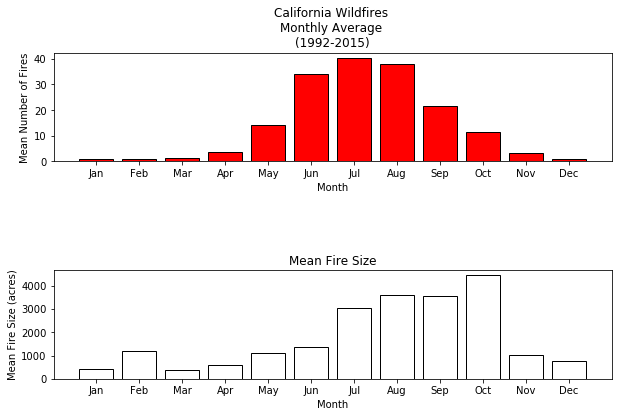

In [24]:
# Make list of months
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# Figure with two plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 6))

# Make a scatter plot (median monthly precipitation)
ax1.bar(x=months,
        height=monthly_mean, 
            color='red',
            edgecolor='black')

# Set plot title and axes labels
ax1.set(
    title="California Wildfires \nMonthly Average \n(1992-2015)",
    xlabel="Month",
    ylabel="Mean Number of Fires",)


# Make a scatter plot (mean monthly precipitation)
ax2.bar(x=months,
        height=monthly_fire_mean_size,
        color='white', edgecolor='black')


# Set plot title and axes labels
ax2.set(
    title="Mean Fire Size",
    xlabel="Month",
    ylabel="Mean Fire Size (acres)",)

plt.subplots_adjust(hspace = 1)

### DO NOT REMOVE LINE BELOW ###
hist_plot_1 = nb.convert_axes(plt, which_axes="all")

In [25]:
# DO NOT MODIFY THIS CELL
count_hist = PlotTester(hist_plot_1[0])
size_hist = PlotTester(hist_plot_1[1])
bar_plot_1, bar_plot_2 = False, False

try:
    count_hist.assert_plot_type('bar')
    print("\u2705 First plot is a bar plot!")
    bar_plot_1 = True
except AssertionError:
    print("\u274C The first plot is not a bar plot, make sure to make it to a bar plot. Tests will not run successfully if this does not pass.")

try:
    size_hist.assert_plot_type('bar')
    print("\u2705 Second plot is a bar plot!")
    bar_plot_2 = True
except AssertionError:
    print("\u274C The second plot is not a bar plot, make sure to make it to a bar plot. Tests will not run successfully if this does not pass.")


✅ First plot is a bar plot!
✅ Second plot is a bar plot!


## Discuss Your Plot

In the Markdown cell below, answer the following questions using a Markdown list.

1. In what month are fires the largest during the time period represented in the two datasets?
2. In what month are there the most fires during the time period represented in this data?
3. If the above answers are different months, can you think of a reason why this trend might occur?


1.) October appears to be the month with the largest average wildfire size (acres) in California (1992-2015)

2.) July is the month with the largest average number of fires in California (1992-2015). 

3.) The cumulative effect of relatively large average number of fires in June, July, Aug, Sept leads to the month of October having the largest average fire size (acres) in California (1992-2015).

<img style="float: left;" src="colored-bar.png"/>

## Challenge 8: Fires by Cause Data

In the cell below do the following: 

1. Loop through, open and combine all of the files in the 
`earthpy-downloads/ca-fires-yearly/1992-2015-gt-100-acres` directory
2. Add a year column to the data
3. Calculate the total count of fires by "cause" using pandas `df.size()`.

In [26]:
# Create path for data directory
data_path3 = os.path.join(et.io.HOME, 
                        "earth-analytics", 
                        "data", 
                        "earthpy-downloads",
                        "ca-fires-yearly",
                        "1992-2015-gt-100-acres")


# Create list of the files in above directory
os.listdir(data_path3)


# Print all dirs found by glob
data_dirs3 = os.path.join(data_path3, "*")
all_dirs3 = glob(data_dirs3)


years3 = []
for a_dir in all_dirs3:
    data_dirs3 = os.path.join(data_path3, "*")
    all_dirs3 = glob(data_dirs3)
    year3 = (os.path.basename(a_dir)[13:17])
    years3.append(year3)

years3

['1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015']

In [27]:
all_df3 = []
for a_file_path in all_dirs3:
    # Read the file into a pandas dataframe and assign it to a variable
    fire_data_df3 = pd.read_csv(a_file_path)
    year3 = (os.path.basename(a_file_path)[13:17])
    fire_data_df3['year'] = year3
    all_df3.append(fire_data_df3)

# Combine all the dataframes stored in the all_df list into one pandas dataframe
df3 = pd.concat(all_df3)
df3.set_index('cause', inplace=True)
df3


# Create empty list
fire_by_cause = []

pd.options.display.float_format = '{:.1f}'.format

# Calcualte mean for each column (month) in dataframe
for i in df3:
    fire_by_cause = df3.groupby(level="cause").size()

fire_by_cause

cause
Arson                 449
Campfire              150
Children               51
Debris Burning        189
Equipment Use         923
Fireworks              10
Lightning             875
Miscellaneous        1013
Missing/Undefined     278
Powerline              64
Railroad               24
Smoking                67
Structure               8
dtype: int64

In [28]:
student_fires_by_cause = _

if isinstance(student_fires_by_cause, pd.Series):
    print("\u2705 Your output is a Pandas Series, good job!")
else:
    print("\u274C Your output is not a Pandas Series, make sure you are running groupby at the end of the cell.")

✅ Your output is a Pandas Series, good job!


In [29]:
# DO NOT MODIFY THIS CELL

In the cell below subset your fires DataFrame so it only contains fires
that are of fire_class_size "G".

In [30]:

class_g = df3[df3["fire_size_class"] == "G"]

class_g = class_g.sort_values(by='year')

#class_g.reset_index(inplace=True)

#class_g.set_index("year", inplace=True)

class_g['year'] = class_g['year'].astype(int)

class_g

,fd_unq_id,source_reporting_unit_name,fire_name,month,month_num,fire_size,fire_size_class,state,county,year
cause,,,,,,,,,,
Miscellaneous,49609,Stanislaus National Forest,GULCH,August,8,18000.0,G,CA,NaN,1992
Campfire,216650,Bakersfield District,MOCCASIN,August,8,8000.0,G,CA,NaN,1992
Equipment Use,216674,Bakersfield District,MID0RIDGE,August,8,7530.0,G,CA,NaN,1992
Lightning,47439,Inyo National Forest,RAINBOW,August,8,8800.0,G,CA,NaN,1992
Arson,49127,Shasta-Trinity National Forest,BARKER,August,8,5050.0,G,CA,NaN,1992
...,...,...,...,...,...,...,...,...,...,...
Miscellaneous,300206706,San Bernardino National Forest,LAKE,June,6,51000.0,G,CA,San Bernardino,2015
Missing/Undefined,300209148,Central California District,ROUND,February,2,6533.0,G,CA,Inyo,2015
Missing/Undefined,300318481,Amador-El Dorado Unit,BUTTE,September,9,70868.0,G,CA,NaN,2015


In [31]:
# DO NOT MODIFY THIS CELL
# Test class g filter

student_class_g_fires = _

class_g_points = 0

if len(student_class_g_fires == 394):
    print("\u2705 Correct number of rows in your class G dataframe!")
    class_g_points += 2
else:
    print("\u274C There are not the correct amount of rows in your class G dataframe.")

if all(x == 'G' for x in student_class_g_fires.fire_size_class.to_list()):
    print("\u2705 Successfully filtered dataframe to only contain class G fires!")
    class_g_points += 2
else:
    print("\u274C Dataframe does not contain only class G fires.")

print("\n \u27A1 You received {} out of 4 points for filtering the class G fires correctly.".format(
    class_g_points))
class_g_points

✅ Correct number of rows in your class G dataframe!
✅ Successfully filtered dataframe to only contain class G fires!

 ➡ You received 4 out of 4 points for filtering the class G fires correctly.


4

## Challenge 9: Subset Fire Cause Data

In the cell below, create two dataframe objects:

1. Create one that  contains data for the years 1995 to 2000 (this DF should contain values for 1995 through 2000).
2. Create a dataframe object that contains data for the years1995 to 2000 (this DF should contain values for 2010 through 2015).

At the end of the cell, call both objects on the same line using the syntax:

`df-one, df-two`

The first and last 5 rows for both objects should then print below the cell.

In [32]:
class_g.reset_index(inplace=True)

class_g

,cause,fd_unq_id,source_reporting_unit_name,fire_name,month,month_num,fire_size,fire_size_class,state,county,year
0,Miscellaneous,49609,Stanislaus National Forest,GULCH,August,8,18000.0,G,CA,NaN,1992
1,Campfire,216650,Bakersfield District,MOCCASIN,August,8,8000.0,G,CA,NaN,1992
2,Equipment Use,216674,Bakersfield District,MID0RIDGE,August,8,7530.0,G,CA,NaN,1992
3,Lightning,47439,Inyo National Forest,RAINBOW,August,8,8800.0,G,CA,NaN,1992
4,Arson,49127,Shasta-Trinity National Forest,BARKER,August,8,5050.0,G,CA,NaN,1992
...,...,...,...,...,...,...,...,...,...,...,...
389,Miscellaneous,300206706,San Bernardino National Forest,LAKE,June,6,51000.0,G,CA,San Bernardino,2015
390,Missing/Undefined,300209148,Central California District,ROUND,February,2,6533.0,G,CA,Inyo,2015
391,Missing/Undefined,300318481,Amador-El Dorado Unit,BUTTE,September,9,70868.0,G,CA,NaN,2015
392,Lightning,300204530,Shasta-Trinity National Forest,JOHNSON,July,7,34006.0,G,CA,Trinity,2015


In [33]:

#class_g.reset_index(inplace=True)

#class_g.set_index('fire_name', inplace=True)


df_one = class_g[class_g['year'].between(1995, 2000)]

df_two = class_g[class_g['year'].between(2010, 2015)]


df_one, df_two 

(              cause  fd_unq_id      source_reporting_unit_name  \
 34          Smoking     219427      California Desert District   
 35         Campfire     248381   Point Reyes National Seashore   
 36    Equipment Use      81806  San Bernardino National Forest   
 37          Smoking      81097       Cleveland National Forest   
 38            Arson     217049            Bakersfield District   
 ..              ...        ...                             ...   
 113  Debris Burning     324972    Northern California District   
 114           Arson    1272339       Cleveland National Forest   
 115   Equipment Use     315556            Bakersfield District   
 116   Equipment Use    1333522           Sonoma-Lake Napa Unit   
 117  Debris Burning     365024      Death Valley National Park   
 
                      fire_name      month  month_num  fire_size  \
 34                    SYCAMORE     August          8     9410.0   
 35                      VISION    October         10    1

In [34]:
# DO NOT MODIFY THIS CELL
# Tests to make sure your dataframes were correctly made

student_g_fires_by_year = _

if isinstance(student_g_fires_by_year[0], pd.core.frame.DataFrame):
    print("\u2705 Great, your first object is a Pandas DataFrame!")
else:
    print("\u274C Didn't call both dataframes at the end of the cell.")

if isinstance(student_g_fires_by_year[1], pd.core.frame.DataFrame):
    print("\u2705 Great, your second object is a Pandas DataFrame!")
else:
    print("\u274C Didn't call both dataframes at the end of the cell.")

student_df_lengths = len(student_g_fires_by_year[0]), len(
    student_g_fires_by_year[1])

if (84, 88) == student_df_lengths or (88, 84) == student_df_lengths:
    print("\u2705 DataFrames have the correct number of rows in them!")
else:
    print("\u274C One or both of the dataframes doesn't have the correct number or rows in the results.")

✅ Great, your first object is a Pandas DataFrame!
✅ Great, your second object is a Pandas DataFrame!
✅ DataFrames have the correct number of rows in them!


<img style="float: left;" src="colored-bar.png"/>

## Challenge 10: Figure - Fires by Cause

Create a figure with two stacked subplots that rendered as **scatterplots** (points) using `ax.plot()` to plot the `1992-2015-gt-100-acres` data. 

For each subplot: 

* Only include points that represent fires of size_class `G` (this is data that you subsetted above).
* Color the points in your plot using the `cause` column in your data. There are a few ways to do this, but for this exercise, color the points by `human-caused` vs `Non-human caused` using a **conditional statement**
within the for loop that you write to create your plot. 

The following causes should be labeled as `human-caused`

`["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad"]`

(HINT: To make the plot look like a scatter plot you can adjust the line and marker options on the plot)

You will use the data / `DataFrame` that you worked with above in the  `1992-2015-gt-100-acres` directory to produce this plot. 

1. The top subplot will contain fires colored by cause for the years: 2010-2015
2. The bottom subplot will contain fires colored by cause for the years 1995-2000


To create these plots, you will need to create a for loop that plots groups pandas dataframes. 

*********
HINT:

* A conditional statement can be used to test whether a string is in an existing list of strings:
```
list_of_things = ["item1", "item2"]

if acategory in list_of_things:
    # Set color
else:
    # Set color  
```

For your plot, be sure to do the following:

1. Use a shared x and y axis by adding `sharex` and `sharey` to your `plt.subplots()` call
example: `plt.subplots(sharex=True)`
2. Use `.plot()` to create your plot and adjust the line style (`linestyle=''`) and marker (`marker='o'`) to make your plot look like a scatter pplot. 
3. Add titles to each subplot
4. Color each category by human vs other cause. You should have a total of two colors  on your plot.
5. Add an overall figure title
6. Add a legend for each plot. The legend should have multiple "causes" (e.g. arson, lightning, etc) but only two different point colors (one for human caused and one for non human caused) 


In [35]:
df_95_00 = df_one.groupby(['month_num'])
#df_95_00.head()


df_10_15 = df_two.groupby(['month_num'])
#df_10_15.head()

df_95_00.head(), df_10_15.head()

(             cause  fd_unq_id  \
 34         Smoking     219427   
 35        Campfire     248381   
 36   Equipment Use      81806   
 37         Smoking      81097   
 38           Arson     217049   
 39       Lightning     247679   
 40   Miscellaneous      81201   
 41           Arson      81078   
 42       Powerline     216977   
 43   Equipment Use    1389310   
 44   Equipment Use      96608   
 49       Powerline     248486   
 50   Equipment Use    1379279   
 51        Campfire     371230   
 52           Arson      96628   
 54   Equipment Use     217121   
 59   Miscellaneous     219797   
 60   Miscellaneous      96317   
 61   Miscellaneous      96289   
 62       Powerline     217088   
 63       Powerline     217087   
 66   Equipment Use     217328   
 73   Equipment Use     104757   
 75       Powerline     217253   
 82           Arson     217477   
 88   Miscellaneous     122767   
 89       Lightning     119535   
 90       Lightning     119532   
 91       Ligh

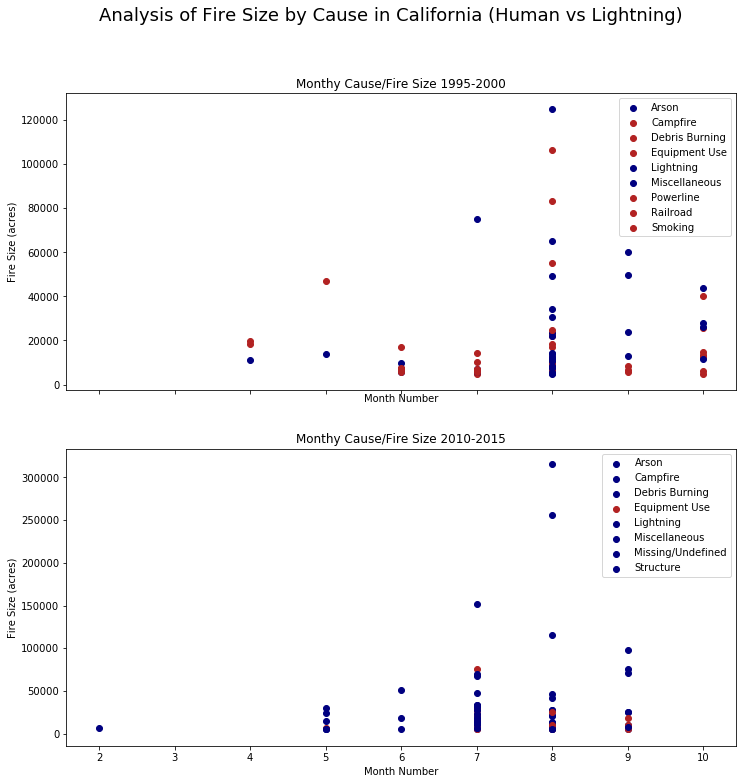

In [36]:
# Assign causes to single (human) cause
human_caused = ["Arson", "Smoking", "Equipment Use", "Campfire", "Powerline", "Railroad", "Debris Burning"]


# Group dataframes by month_num
plot_grp_one = df_one.groupby(['month_num'])
plot_grp_two = df_two.groupby(['month_num'])


# Set parameters for figure
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(12,12),sharex=True)
fig.suptitle("Analysis of Fire Size by Cause in California (Human vs Lightning)",fontsize=18)

# Build loop to generate bottom figure (1995-2000)
for month_num, fire_list in plot_grp_one:
    for cause,fire_size in zip(fire_list.cause.values, fire_list.fire_size.values):
        if cause in human_caused:
            ax1.scatter(month_num,
                        fire_size,
                        color='firebrick',
                        label=cause)
        else:
            ax1.scatter(month_num,
                        fire_size,
                        color='navy',
                        label=cause)
    ax1.set(title="Monthy Cause/Fire Size 1995-2000",
            xlabel="Month Number",
            ylabel="Fire Size (acres)")

    
    
# Build loop to generate bottom figure (2010-2015)
for month_num, fire_list in plot_grp_two:
    for cause,fire_size in zip(fire_list.cause.values, fire_list.fire_size.values):
        if cause in human_caused:
            ax2.scatter(month_num,
                        fire_size,
                        color='firebrick',
                        label=cause)
        else:
            ax2.scatter(month_num,
                        fire_size,
                        color='navy',
                        label=cause)
    ax2.set(title="Monthy Cause/Fire Size 2010-2015",
            xlabel="Month Number",
            ylabel="Fire Size (acres)")
    

# create the sorted legend for the top plot
handles, labels = ax1.get_legend_handles_labels()
unique = list(set(labels))
unique.sort()
ax1.legend(handles, unique)


# create the sorted legend for the bottom plot
handles, labels = ax2.get_legend_handles_labels()
unique = list(set(labels))
unique.sort()
ax2.legend(handles, unique)

In [37]:
# NOTE: 2010-2015 Data NEEDS TO BE THE TOP PLOT FOR THE AUTOGRADER TO WORK!

if len(fire_causes_plot) == 2:
    print("\u2705 You successfully added two plots to your figure, good job!")
else:
    print("\u274C There are not two plots in your figure, make sure you plot the 2000 and 2015 data.")

NameError: name 'fire_causes_plot' is not defined

In [ ]:
# DO NOT MODIFY THIS CELL

In [ ]:
# DO NOT MODIFY THIS CELL

# Manual Grade
The plot above has only two colors / categories - Human caused and non human caused.

## Challenge 11: Discuss Your Plot

Look at the plot above. Do you notice a difference in fire size between 1995-2000 and 2010-2015?
Add your answer to the markdown cell below.

Yes, I'm noticing that the fire size has gotten nearly 2.5x larger when comparing 2010-2015 with 1995-2000, jumping from 120,000 acres to over 300,000 acres.

## Pep 8, Spelling and Does the Notebook Run?
In this cell, we will give you points for the following

1. PEP 8 is followed throughout the notebook (4 points)
2. Spelling and grammar are considered in your written responses above (4 points)
3. The notebook runs from top to bottom without any editing (it is reproducible) - 4 points